In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('C:/Users/udbha/Desktop/Python/competitions/Heart attack/data/train_values.csv')
test = pd.read_csv('C:/Users/udbha/Desktop/Python/competitions/Heart attack/data/test_values.csv')
train_labels = pd.read_csv('C:/Users/udbha/Desktop/Python/competitions/Heart attack/data/train_labels.csv')


In [3]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [5]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
train.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [7]:
train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [8]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
train['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [10]:
train.shape

(180, 14)

In [30]:
train.thal = pd.Categorical(train.thal).codes
test.thal = pd.Categorical(test.thal).codes

In [12]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [13]:
train.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [14]:
train.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [15]:
train=train.rename(columns={'patient_id':'id','slope_of_peak_exercise_st_segment':'slope','thal':'thal','resting_blood_pressure':'bp','chest_pain_type':'pain_type', 'num_major_vessels':'num_maj_vsl','fasting_blood_sugar_gt_120_mg_per_dl':'sugar','resting_ekg_results':'ekg','serum_cholesterol_mg_per_dl':'cholestrol','oldpeak_eq_st_depression':'depression','sex':'sex','age':'age','max_heart_rate_achieved':'max_hrt_rate','exercise_induced_angina':'agnia'})

In [31]:
test=test.rename(columns={'patient_id':'id','slope_of_peak_exercise_st_segment':'slope','thal':'thal','resting_blood_pressure':'bp','chest_pain_type':'pain_type', 'num_major_vessels':'num_maj_vsl','fasting_blood_sugar_gt_120_mg_per_dl':'sugar','resting_ekg_results':'ekg','serum_cholesterol_mg_per_dl':'cholestrol','oldpeak_eq_st_depression':'depression','sex':'sex','age':'age','max_heart_rate_achieved':'max_hrt_rate','exercise_induced_angina':'agnia'})

In [16]:
train.head()

,id,slope,thal,bp,pain_type,num_maj_vsl,sugar,ekg,cholestrol,depression,sex,age,max_hrt_rate,agnia
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [17]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [18]:
train_labels=train_labels.rename(columns={'patient_id':'id','heart_disease_present':'outcome'})

In [19]:
frames=[train,train_labels]
train_f=pd.merge(train,train_labels,how='left',on=['id'])

In [20]:
train_labels.head()

,id,outcome
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [21]:
train_f.head()

,id,slope,thal,bp,pain_type,num_maj_vsl,sugar,ekg,cholestrol,depression,sex,age,max_hrt_rate,agnia,outcome
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


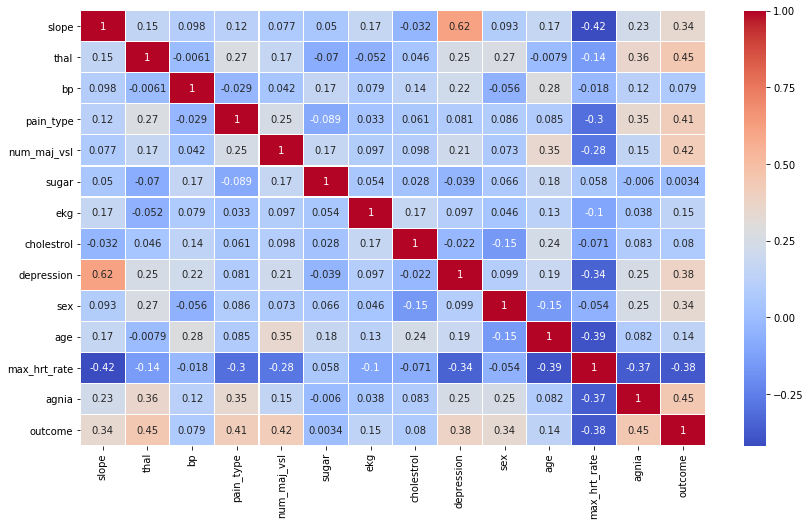

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(train_f.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

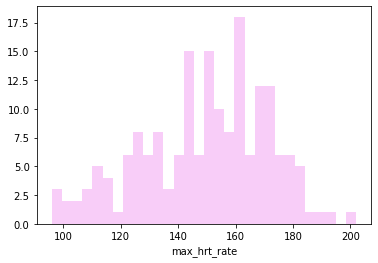

In [23]:
sns.distplot(train_f['max_hrt_rate'],kde=False,bins=30,color='violet')

In [24]:
X=train_f.drop('outcome',axis=1)

In [25]:
X=X.drop('id',axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_test=test.drop('id',axis=1)

In [36]:
X_test.head()

,slope,thal,bp,pain_type,num_maj_vsl,sugar,ekg,cholestrol,depression,sex,age,max_hrt_rate,agnia
0,2,2,170,1,0,0,2,288,0.2,1,59,159,0
1,1,1,138,4,0,0,0,183,1.4,0,35,182,0
2,2,2,120,4,0,0,2,177,2.5,1,43,120,1
3,1,1,102,3,1,0,0,318,0.0,0,60,160,0
4,2,1,138,4,1,0,2,166,3.6,1,61,125,1


In [27]:
X.columns

Index(['slope', 'thal', 'bp', 'pain_type', 'num_maj_vsl', 'sugar', 'ekg',
       'cholestrol', 'depression', 'sex', 'age', 'max_hrt_rate', 'agnia'],
      dtype='object')

In [28]:
X.head()

,slope,thal,bp,pain_type,num_maj_vsl,sugar,ekg,cholestrol,depression,sex,age,max_hrt_rate,agnia
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [29]:
train_f.head()

,id,slope,thal,bp,pain_type,num_maj_vsl,sugar,ekg,cholestrol,depression,sex,age,max_hrt_rate,agnia,outcome
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [37]:
X_train=X

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [39]:
y_train = train_f['outcome']

In [42]:


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)



In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_val)



In [49]:
y_pred.shape

(45,)

In [50]:
y_val.shape

(45,)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[21,  8],
       [ 2, 14]], dtype=int64)

In [52]:
Recall = cm[0,0]/(cm[0,0]+cm[1,0])
print('Recall : ', Recall )

Sp = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specifity : ', Sp)

Recall :  0.9130434782608695
Specifity :  0.6363636363636364


In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.76


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[20  9]
 [ 2 14]]
